In [40]:
import pandas as pd

In [41]:
train = pd.read_csv("train.csv")

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


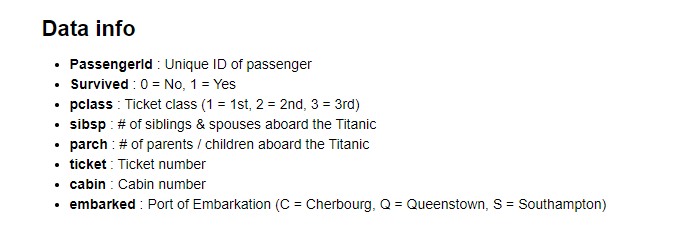

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train['initial']=train['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

In [7]:
train['initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: initial, Length: 891, dtype: object

In [8]:
train_null = train[train['Age'].isnull()]

In [9]:
train_null['initial'].value_counts()

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: initial, dtype: int64

In [10]:
mr = round(train[train['initial'] == 'Mr']['Age'].mean())
mrs = round(train[train['initial'] == 'Mrs']['Age'].mean())
master = round(train[train['initial'] == 'Master']['Age'].mean())
miss = round(train[train['initial'] == 'Miss']['Age'].mean())
dr = round(train[train['initial'] == 'Dr']['Age'].mean())

In [11]:
train.loc[train['initial']=='Mr','Age']=train.loc[train['initial']=='Mr','Age'].fillna(mr)
train.loc[train['initial']=='Mrs','Age']=train.loc[train['initial']=='Mrs','Age'].fillna(mrs)
train.loc[train['initial']=='Master','Age']=train.loc[train['initial']=='Master','Age'].fillna(master)
train.loc[train['initial']=='Miss','Age']=train.loc[train['initial']=='Miss','Age'].fillna(miss)
train.loc[train['initial']=='Dr','Age']=train.loc[train['initial']=='Dr','Age'].fillna(dr)

In [12]:
train['Age'].isnull().sum()

0

In [13]:
train=train.drop(columns=['PassengerId','Name','Cabin','Ticket','initial'])


In [14]:
train['Sex']=train['Sex'].str.replace('female','0')
train['Sex']=train['Sex'].str.replace('male','1')

In [15]:
train=train.dropna(axis=0)

In [16]:
train=pd.get_dummies(data=train, columns=['Embarked'], prefix=['Embarked'])

In [17]:
train['Sex']=train['Sex'].astype('float64')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    float64
 3   Age         889 non-null    float64
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Fare        889 non-null    float64
 7   Embarked_C  889 non-null    uint8  
 8   Embarked_Q  889 non-null    uint8  
 9   Embarked_S  889 non-null    uint8  
dtypes: float64(3), int64(4), uint8(3)
memory usage: 58.2 KB


---

In [19]:
train_target=train['Survived'].to_numpy()
train_input=train[train.columns.difference(['Survived'])].to_numpy()

In [20]:
from sklearn.model_selection import train_test_split
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=800)

In [21]:
print(sub_input.shape, val_input.shape)

(711, 9) (178, 9)


In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=800)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

#--> 과대적합

0.9859353023909986
0.7865168539325843


In [23]:
#모델성능향상작업

In [24]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
import numpy as np

print(np.mean(scores['test_score']))

0.7660445629403922


In [25]:
#교차검증적용현황

In [26]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.7660445629403922


In [27]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.7660623084780388


## 하이퍼파라미터 튜닝

In [28]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [29]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [30]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [31]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.937007874015748


In [32]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0005}


In [33]:
print(gs.cv_results_['mean_test_score'])

[0.76266743 0.76380372 0.7795531  0.78630102 0.79754967]


In [34]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0005}


In [35]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), #9개
          'max_depth': range(5, 20, 1), #15개
          'min_samples_split': range(2, 100, 10) #10개
          }

In [36]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=800), params, n_jobs=-1)
# 총 튜닝 횟수: 10 * 10 * 15 * 10 =15000
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=800), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [37]:
print(gs.best_params_)

{'max_depth': 10, 'min_impurity_decrease': 0.0009000000000000001, 'min_samples_split': 2}


In [38]:
# 구간별 test_score
print(np.max(gs.cv_results_['mean_test_score']))

0.8301783787215132


In [39]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=800)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9493844719417183 0.8222941661905668
